<font color='DarkSlateBlue'> 

# Multiple Linear Regression
## Rental bike Case Study

</font> 

#### Problem Statement:

Build a multiple linear regression model for the prediction of demand for shared bike

-  bike are made available for shared use to individuals on a short term basis for a price or free
-  allow people to borrow a bike from a "dock" which is usually computer-controlled 
-  User enters the payment information, and the system unlocks it
-  This bike can then be returned to another dock belonging to the same system.
-  US bike-sharing provider Boombike Recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 
-  The company finding difficult to sustain in the current market scenario. 

-  Boombike decided to come up with a business plan:
    - To accelerate its revenue as soon as the ongoing lockdown comes to an end, 
    - and the economy restores to a healthy state. 
    
#### Boombike company's aspirations    
- To understand demand after this ongoing quarantine situation ends across the nation due to Covid-19. 
- Planned this to prepare themselves to cater to the people's needs once the situation gets better all around
- Stand out from other service providers and make huge profits.  


#### We, as a Consulting company expectation

- To understand the factors on which the demand for these shared bike depends. 
- Specifically, they want to understand the factors affecting the demand for these shared bike market. 
- Which variables are significant in predicting the demand for shared bike.
- How well those variables describe the bike demands
- Done various meteorological surveys and people's styles, the firm has a large dataset on daily bike demands 


#### Business Goal:
 - Model the demand for shared bike with the available independent variables. 
 - Management wants to understand how exactly the demands vary with different features. 
 - They can accordingly manipulate the business strategy to meet the demand and meet the customer's expectations.  
 - The model will be a good way for management to understand the demand dynamics of a new market. 

## <font color='DarkSlateBlue'>High Level Steps </font> 


 1. Reading, understanding and visualising the data
 2. Preparing the data for modelling (train-test split, rescaling etc.)
 3. Training the model
 4. Residual analysis
 5. Predictions and evaluation on the test set

## <font color='DarkSlateBlue'>Import Modules and Set Display Options </font> 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score #for r2_score(y_test, y_pred)


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('/Users/shrinivasd/3Upgrad-Main/Graded_MLR_Bike Assignment/Git uploaded/')
pd.set_option('display.max_columns', None)

sns.set_style("whitegrid")

## <font color='DarkSlateBlue'>Downloading data and loading data as data frame </font> 

In [5]:
# Read file and inspect each column in reference with data dictionary provided
bikes_df = pd.read_csv('day.csv')
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## <font color='DarkSlateBlue'>Find out total rows and columns and some data info / quartiles values </font> 

In [6]:
#Initial rows-730 & cols-16
bikes_df.shape

(730, 16)

In [7]:
# Check bike df for null and datatype 
# Data types seems -integer , Float, object
# All cols have 730 data entries , so we dont have missing data, so nothing to impute
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Check for numerical data quartiles
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###  <font color='DarkSlateBlue'>Double Check for Null values</font> 

In [9]:
bikes_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## <font color='blue'>Observations : </font> 
- <font color='blue'> 730 rows and 16 columns. </font> 
- <font color='blue'> No null values in any of column. Hence nothing to impute </font> 
- <font color='blue'> Except dteday, all other are either float / integer. </font> 
- <font color='blue'> dteday contains dates. </font> 
- <font color='blue'> We have some fields with integer/float type but are categorical in nature. Need to handel them </font> 

###  <font color='DarkSlateBlue'>Derived Column</font> 

In [10]:
bikes_df['dteday'].min()

'01-01-2018'

In [11]:
#To get better inferences we can get number of days since 01-01-2018 i.e the first value in dataset 
#To check if age of the business affects the count(Target variable)
bikes_df['age_of_business'] = (pd.to_datetime(bikes_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

## <font color='DarkSlateBlue'>Removing redundant columns </font> 

## <font color='blue'>Observations : </font> 
- <font color='blue'> **Instant** is just index hence can be dropped </font> 
- <font color='blue'> **dteday** not needed as separate year and month cols available. </font> 
- <font color='blue'> **Cnt** is sum of **casual** + **registered** hence can be dropped. </font> 

In [12]:
bikes_df.drop(['instant'], axis=1, inplace = True)
bikes_df.drop(['dteday'], axis=1, inplace = True)
bikes_df.drop(['casual'], axis=1, inplace = True)
bikes_df.drop(['registered'], axis=1, inplace = True)

###  <font color='DarkSlateBlue'>Rename Columns for readability</font> 

In [13]:
#rename
bikes_df = bikes_df.rename({'yr':'year',
                            'mnth':'month',
                            'hum':'humidity'},axis=1)

In [14]:
bikes_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,age_of_business
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


## <font color='DarkSlateBlue'>Check if any Duplicate rows </font> 

In [15]:
duplicate = bikes_df[bikes_df.duplicated()]
print("Duplicate Rows :", duplicate)

Duplicate Rows : Empty DataFrame
Columns: [season, year, month, holiday, weekday, workingday, weathersit, temp, atemp, humidity, windspeed, cnt, age_of_business]
Index: []


## <font color='blue'>Observations : </font> 
<font color='blue'> No duplicate rows as resulted Empty DataFrame in output </font> 

## <font color='DarkSlateBlue'>Change Data Types to make Categorical </font> 
<font color='DarkSlateBlue'> As per df head data, features like season, month, weekday and weathersit are integers although they should be Categorical. </font> 

In [16]:
bikes_df['season'] = bikes_df['season'].astype('category')
bikes_df['month'] = bikes_df['month'].astype('category')
bikes_df['weekday'] = bikes_df['weekday'].astype('category')
bikes_df['weathersit'] = bikes_df['weathersit'].astype('category')

In [17]:
# Check updated df info
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season           730 non-null    category
 1   year             730 non-null    int64   
 2   month            730 non-null    category
 3   holiday          730 non-null    int64   
 4   weekday          730 non-null    category
 5   workingday       730 non-null    int64   
 6   weathersit       730 non-null    category
 7   temp             730 non-null    float64 
 8   atemp            730 non-null    float64 
 9   humidity         730 non-null    float64 
 10  windspeed        730 non-null    float64 
 11  cnt              730 non-null    int64   
 12  age_of_business  730 non-null    int64   
dtypes: category(4), float64(4), int64(5)
memory usage: 55.4 KB


###  <font color='DarkSlateBlue'>Encoding/mapping as per data dictionary values for readability</font> 
<font color='DarkSlateBlue'>Columns "season" and "weathersit" have labels which indicates some order which is not the case actually hence these values need to be converted to categorical variables</font> 

In [18]:
bikes_df['season'] = bikes_df['season'].replace({1:"spring",
                                               2:"summer",
                                               3:"fall",
                                               4:"winter"})

bikes_df['weathersit'] = bikes_df['weathersit'].replace({1:'Clear',
                                                       2:'Misty',
                                                       3:'Light_snowrain',
                                                       4:'Heavy_snowrain'})

bikes_df['month'] = bikes_df['month'].replace({1: 'jan',2: 'feb',3: 'mar',
                                           4: 'apr',5: 'may',6: 'jun',
                                           7: 'jul',8: 'aug',9: 'sept',
                                           10: 'oct',11: 'nov',12: 'dec'})

bikes_df['weekday'] = bikes_df['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})


bikes_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,age_of_business
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


###  <font color='DarkSlateBlue'>Find continuous and categorical</font> 

In [19]:
data_cols = bikes_df.describe().columns
continuous = [col for col in bikes_df.columns if col in data_cols]
categorical = [col for col in bikes_df.columns if col not in data_cols]

In [20]:
bikes_df[continuous].describe().round()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,age_of_business
count,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0
mean,0.0,0.0,1.0,20.0,24.0,63.0,13.0,4508.0,364.0
std,1.0,0.0,0.0,8.0,8.0,14.0,5.0,1936.0,211.0
min,0.0,0.0,0.0,2.0,4.0,0.0,2.0,22.0,0.0
25%,0.0,0.0,0.0,14.0,17.0,52.0,9.0,3170.0,182.0
50%,0.0,0.0,1.0,20.0,24.0,63.0,12.0,4548.0,364.0
75%,1.0,0.0,1.0,27.0,30.0,73.0,16.0,5966.0,547.0
max,1.0,1.0,1.0,35.0,42.0,97.0,34.0,8714.0,729.0


In [21]:
bikes_df[categorical].describe().round()

,season,month,weekday,weathersit
count,730,730,730,730
unique,4,12,7,3
top,fall,jan,sun,Clear
freq,188,62,105,463


## <font color='blue'>Observations : </font> 
<font color='blue'> We have 9 numerical and 4 Categorical values  </font> 

###  <font color='DarkSlateBlue'>Find Skew for continuous variable</font> 

In [22]:
bikes_df[continuous].skew().sort_values(ascending = False).head(10)

holiday            5.650014
windspeed          0.676314
year               0.000000
age_of_business    0.000000
cnt               -0.049581
temp              -0.057187
humidity          -0.067476
atemp             -0.133709
workingday        -0.790992
dtype: float64

## <font color='blue'>Observations : </font> 
- <font color='blue'> Data seems not much skewed  </font> 
- <font color='blue'> Some values have negative skewness and can be ignored  </font> 

###  <font color='DarkSlateBlue'> Check for Junk/Unknown values in the entire dataset</font> 

In [23]:
col_list = list(bikes_df.columns.values)

In [24]:
for col in list(col_list): 
    print(bikes_df[col].value_counts())
    print("--"*30)       

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
------------------------------------------------------------
0    365
1    365
Name: year, dtype: int64
------------------------------------------------------------
jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: month, dtype: int64
------------------------------------------------------------
0    709
1     21
Name: holiday, dtype: int64
------------------------------------------------------------
sun    105
mon    105
sat    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64
------------------------------------------------------------
1    499
0    231
Name: workingday, dtype: int64
------------------------------------------------------------
Clear             463
Misty             246
Light_snowrain     21
Name: weathersit, dtype: int64
-----------------------------------------------------

## <font color='blue'>Observations : </font> 
- <font color='blue'> Using value count, checked data in bikes_df </font> 
- <font color='blue'> No Junk / NA rows in entire DataFrame </font> 

## <font color='DarkSlateBlue'>Exploratory Data Analysis - Univariate, Bivariate and Multivariate </font> 

## <font color='DarkSlateBlue'>Visualisation the data </font> 
- <font color='DarkSlateBlue'> To check if linear regression model makes sense for given data </font> 
- <font color='DarkSlateBlue'> To check if any multicollinearity </font> 
- <font color='DarkSlateBlue'> If yes, need to take care of multicollinearity </font> 

## <font color='DarkSlateBlue'>Numeric Variables  - Pair Plots </font> 
<font color='DarkSlateBlue'> Let's make a pairplot For Numeric Continuous Variable to check if any relationship with target variable i.e cnt </font> 

<Figure size 1500x3000 with 0 Axes>

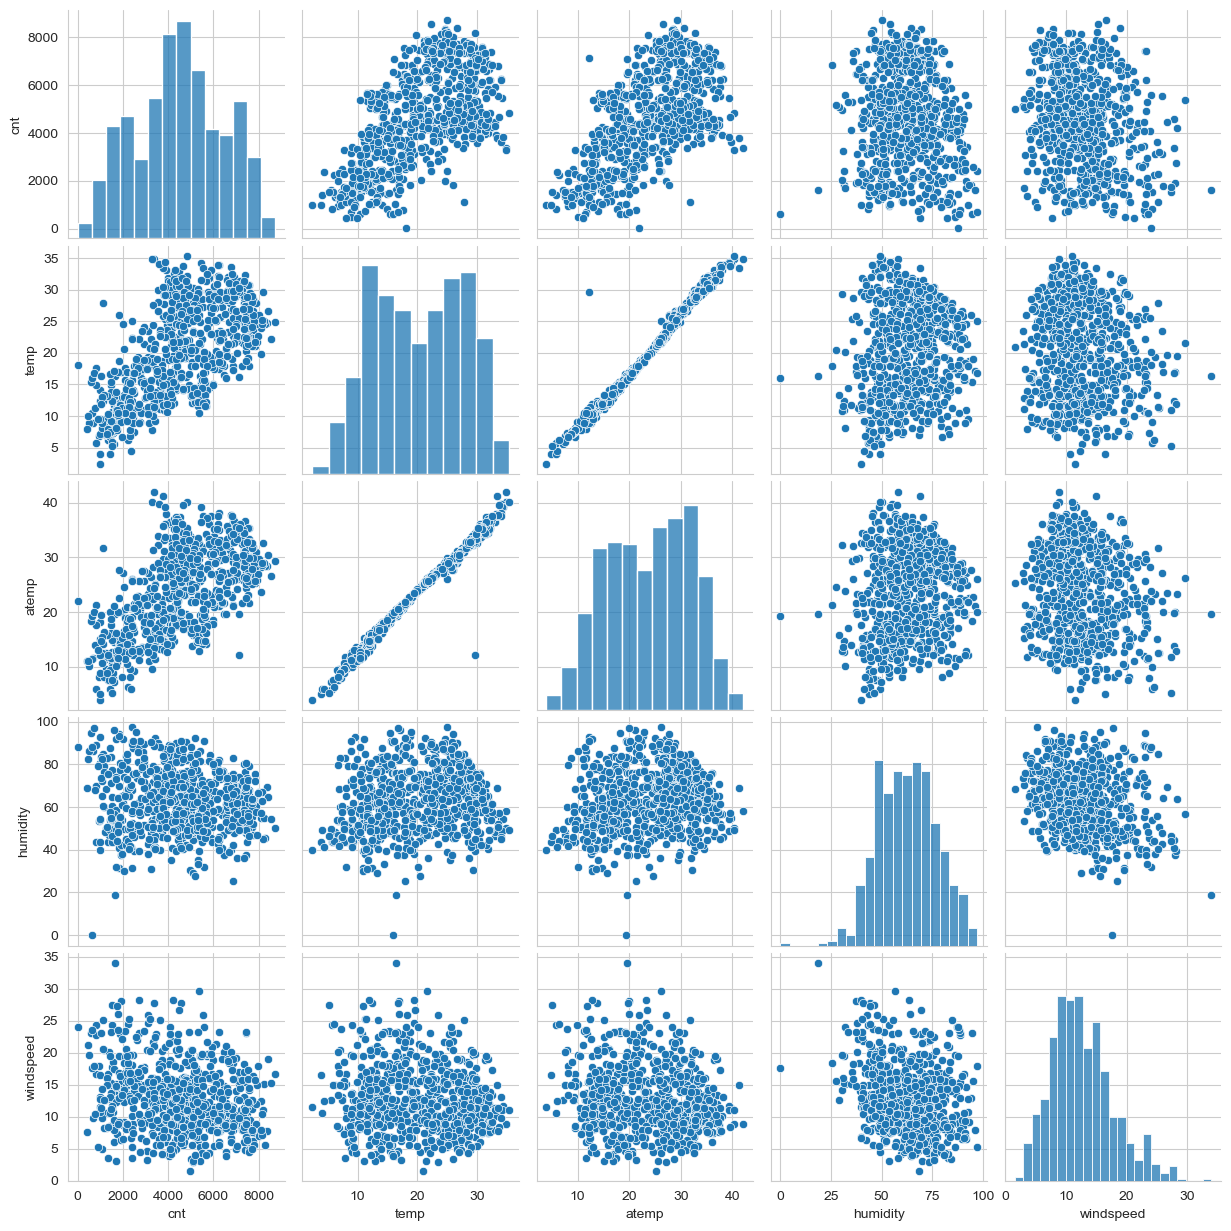

In [25]:
plt.figure(figsize = (15,30))
pp = sns.pairplot(data=bikes_df,
                  vars=['cnt', 'temp','atemp','humidity','windspeed'])
plt.show()

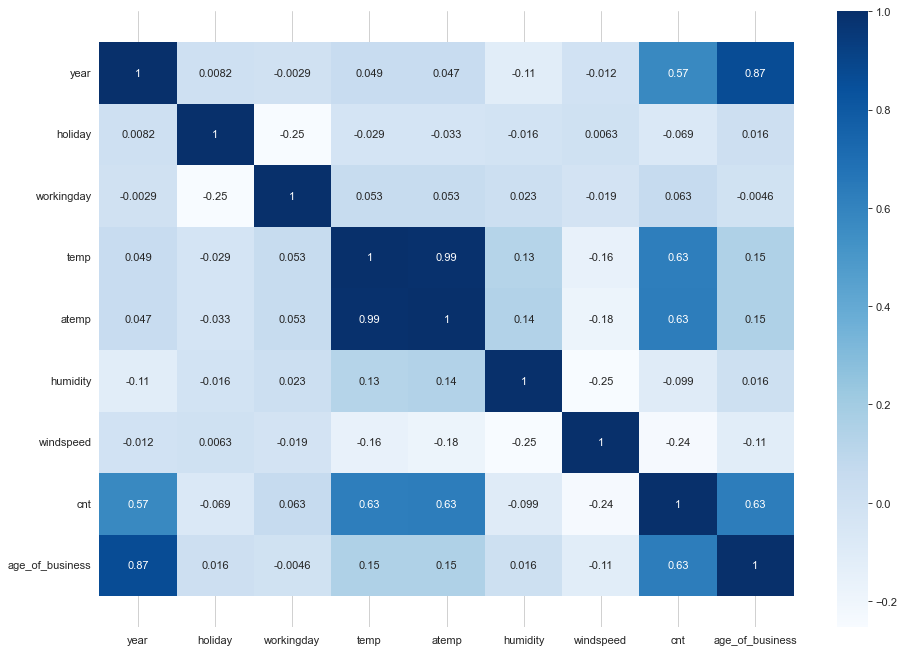

In [26]:
#Correlations for numeric variables
correlations=bikes_df.corr()
fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
ax=sns.heatmap(correlations, annot = True,cmap="Blues")
bottom, top = ax.get_ylim()
plt.yticks(rotation=0) 
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## <font color='blue'>Observations : </font> 
- <font color='blue'> temp, atemp, age_of_business has the highest corelation with the target variable cnt - with correlation of 0.63 </font> 
- <font color='blue'> temp and atemp are highly co-related with each other - with correlation of 0.99 </font> 
- <font color='blue'> Based on further data, multicollinearity of temp and atemp will be handled </font> 
- <font color='blue'> Therefore, as per initial glance output variable has a **linear relationship** with variables like temp, atemp. We will check further</font> 


## <font color='DarkSlateBlue'>Numeric Variables  - Reg Plots </font> 

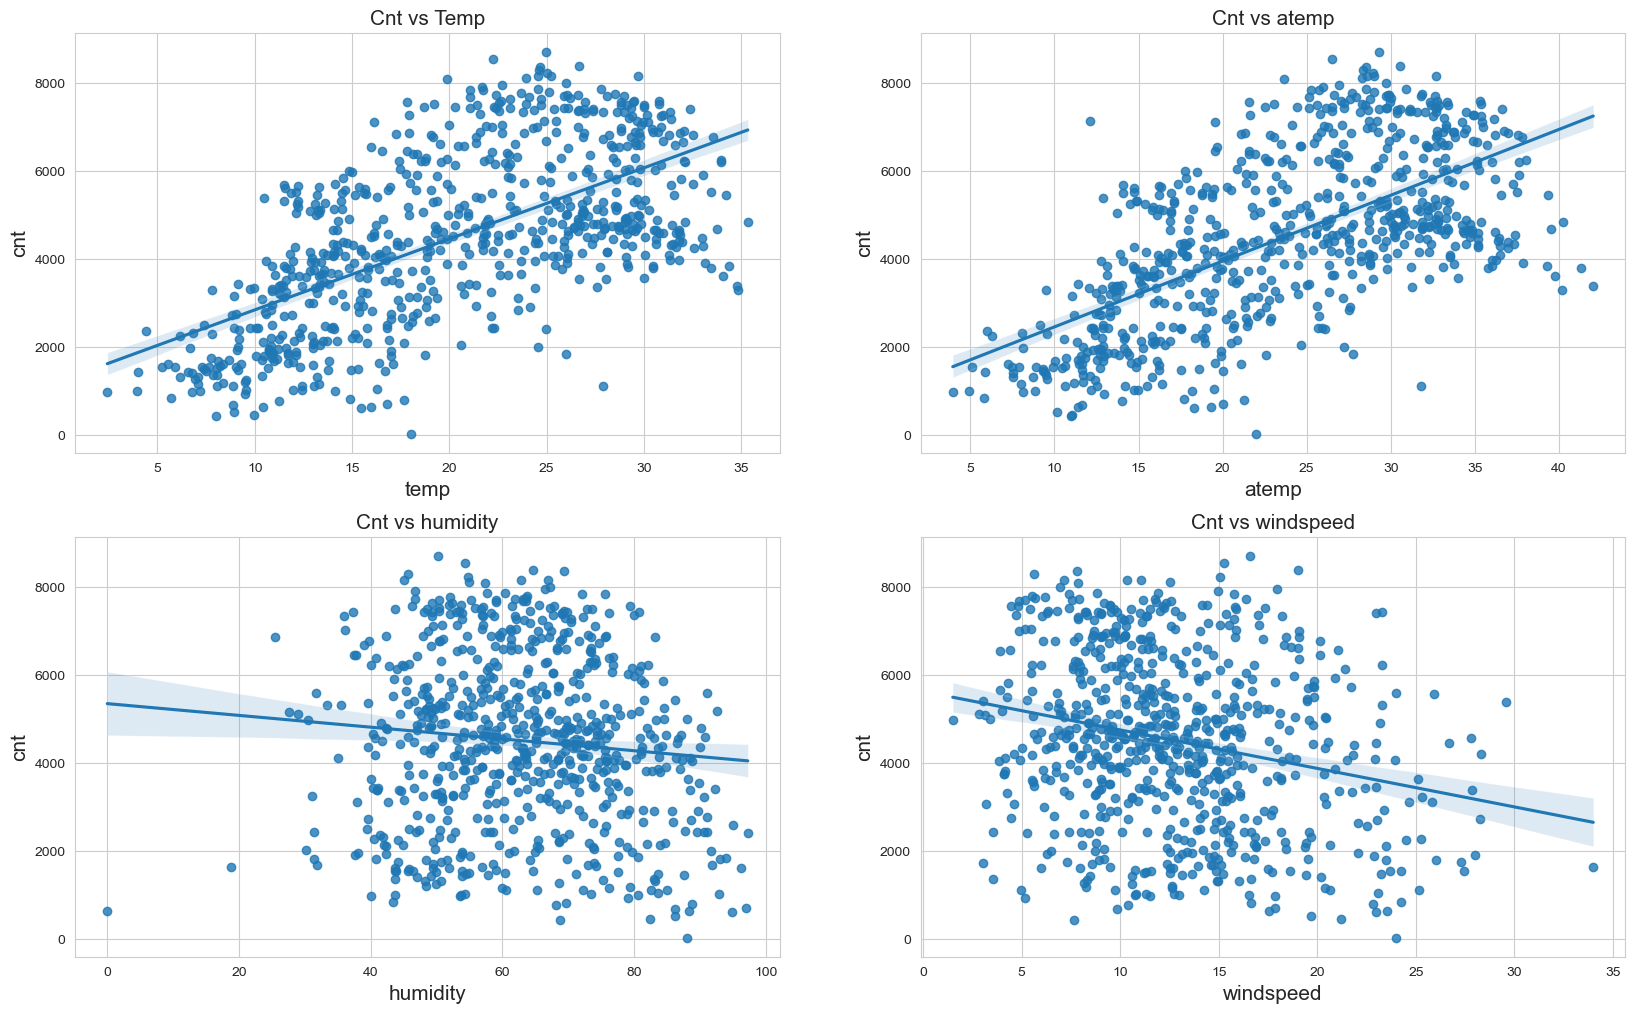

In [27]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plt.title("Cnt vs Temp",fontsize=15)
sns.regplot(x = 'temp', y = 'cnt', data = bikes_df)
plt.xlabel('temp', fontsize=15);
plt.ylabel('cnt', fontsize=15);

plt.subplot(2,2,2)
plt.title("Cnt vs atemp",fontsize=15)
sns.regplot(x = 'atemp', y = 'cnt', data = bikes_df)
plt.xlabel('atemp', fontsize=15);
plt.ylabel('cnt', fontsize=15);

plt.subplot(2,2,3)
plt.title("Cnt vs humidity",fontsize=15)
sns.regplot(x = 'humidity', y = 'cnt', data = bikes_df)
plt.xlabel('humidity', fontsize=15);
plt.ylabel('cnt', fontsize=15);

plt.subplot(2,2,4)
plt.title("Cnt vs windspeed",fontsize=15)
sns.regplot(x = 'windspeed', y = 'cnt', data = bikes_df)
plt.xlabel('windspeed', fontsize=15);
plt.ylabel('cnt', fontsize=15);
plt.show()

## <font color='blue'>Observations : </font> 
- <font color='blue'> Demand for bikes is positively correlated to temp and atemp. cnt is linearly increasing with temp indicating linear relation. </font> 
- <font color='blue'> humidity values are more scattered around.  cnt decreasing with increase in humidity. Hence humidity seems to have negative relation</font> 
- <font color='blue'> Windspeed values are more scattered around. cnt decreasing with increase in Windspeed. Hence Windspeed seems to have negative relation </font> 

## <font color='DarkSlateBlue'>Numeric Variables  - Box Plots </font> 
<font color='DarkSlateBlue'> Let's make a BoxPlots For Numeric Continous Variable to check data spread </font> 

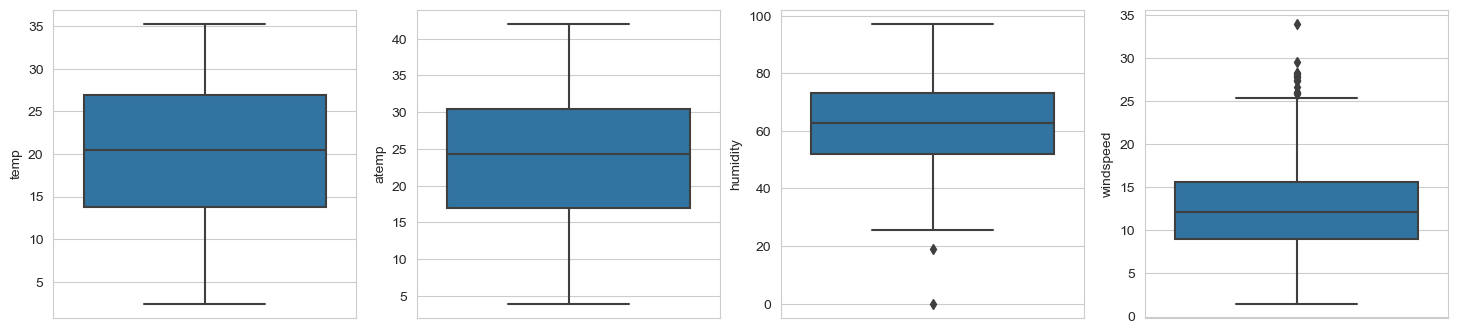

In [28]:
# Draw box plots for independent variables with Continuous  values
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikes_df)
    i+=1

## <font color='blue'>Observations : </font> 
- <font color='blue'> Columns temp and atemp seems almost same median </font> 
- <font color='blue'> No outliers seen in the data set </font> 

## <font color='DarkSlateBlue'>Categorical Variables  - Box Plots </font> 
<font color='DarkSlateBlue'> Make a boxplot for some of these variables to visualise the medians and spread </font> 

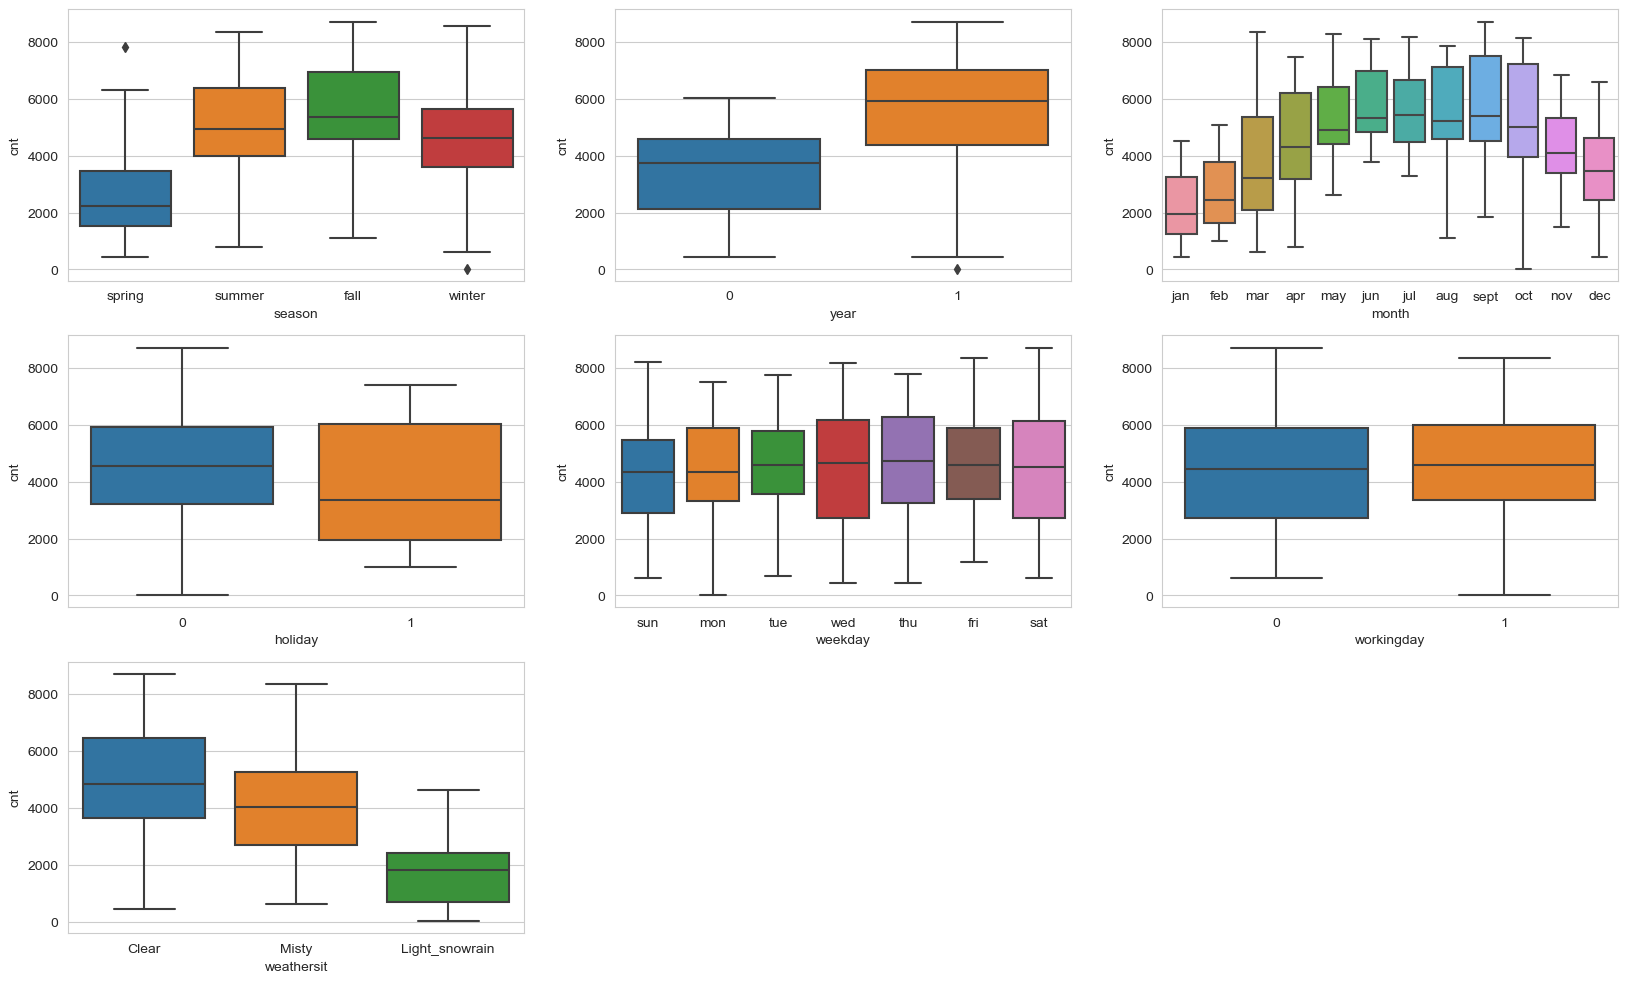

In [29]:
# Visualising the Catg Variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = bikes_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = bikes_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_df)

plt.show()

## <font color='blue'>Observations : </font> 
- <font color='blue'> **Season**: fall seems popular with a median of over 5000 booking. Followed by Summer & Winter. Spring season has least demand. Season can be a good predictor for the dependent variable. </font> 
- <font color='blue'> **Year**: We see demand for next year has grown (More demand in 2019 than 2018). bike-sharing systems are slowly gaining popularity </font> 
- <font color='blue'> **month**: Months May, June, July, Aug, Sept & Oct with a median of over 4000 booking per month. Towards starting and towards the end of the year the demand is less. month can be a good predictor for the dependent variable. </font> 
- <font color='blue'> **holiday**: During Holidays the demand increases </font> 
- <font color='blue'> **weekday**: Weekday is not giving clear picture about demand. This variable can have some or no influence towards the predictor. let the model decide if this needs to be added or not. </font> 
- <font color='blue'> **workingday**: Slight increase in demand during ‘workingday’ with a median of close to 5000 booking. </font> 
- <font color='blue'> **weathersit**: The Clear weather has highest demand with median of close to 5000 booking. Followed by Misty weather. Can be a good predictor for the dependent variable. </font> 

## <font color='DarkSlateBlue'>Categorical Variables  - Bar Plots </font> 
<font color='DarkSlateBlue'> Make a Barplot for some of these variables to visualise </font> 

In [30]:
# function to create barplot related to categorical columns
def plot_cat_columns(cat_col):
    plt.figure(figsize = (12,3))
    plt.subplot(1,2,1)
    sns.barplot(x = cat_col, y = 'cnt' ,data=bikes_df, palette ='coolwarm')
    plt.subplot(1,2,2)
    sns.barplot(x = cat_col, y = 'cnt' ,data=bikes_df, hue='year', palette ='coolwarm', errorbar=None)
    plt.legend(labels=['2018', '2019'])
    plt.show()

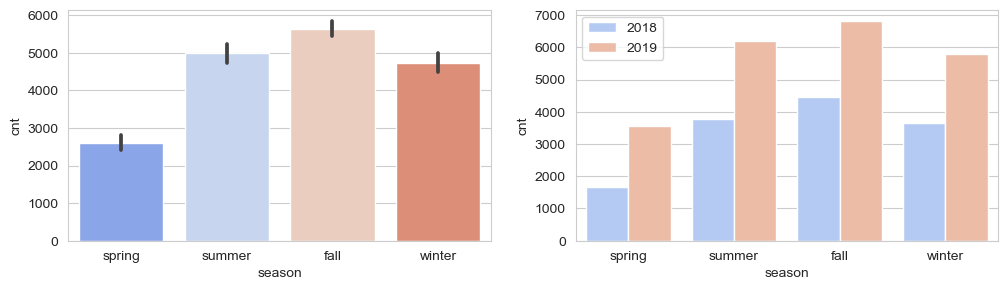

In [31]:
# plotting visualization for season column
plot_cat_columns('season')

## <font color='blue'>Observations : </font> 
<font color='blue'> Fall season has more bookings compared to others, from 2018 to 2019 the bookings are drastically gets increased </font> 

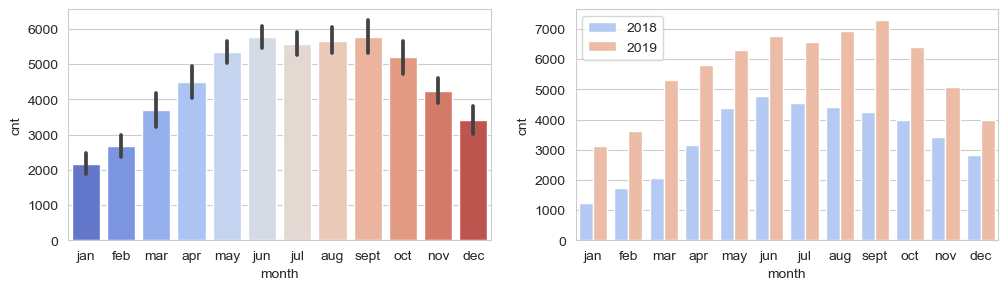

In [32]:
# plotting visualization for month column
plot_cat_columns('month')

## <font color='blue'>Observations : </font> 
- <font color='blue'> Most of the bookings in the period of May, June,July,August,September and october is performed. Number of booking for each month seems to have increased from 2018 to 2019. </font> 

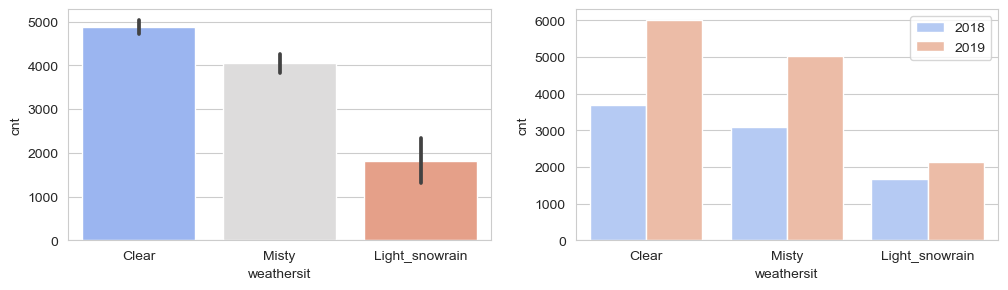

In [33]:
# plotting visualization for weathersit column
plot_cat_columns('weathersit')

## <font color='blue'>Observations : </font> 
<font color='blue'> Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019. </font> 

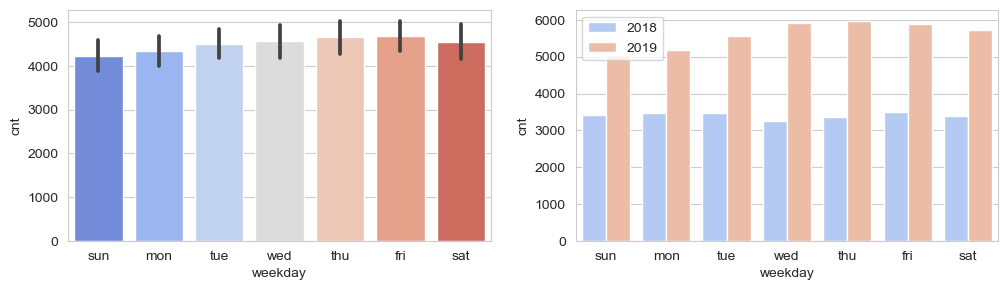

In [34]:
# plotting visualization for weekday column
plot_cat_columns('weekday')

## <font color='blue'>Observations : </font> 
<font color='blue'> Thru, Fri, Sat has high bookings compared to the other week days. And in comparison to previous year, i.e 2018, booking increased in 2019. </font> 

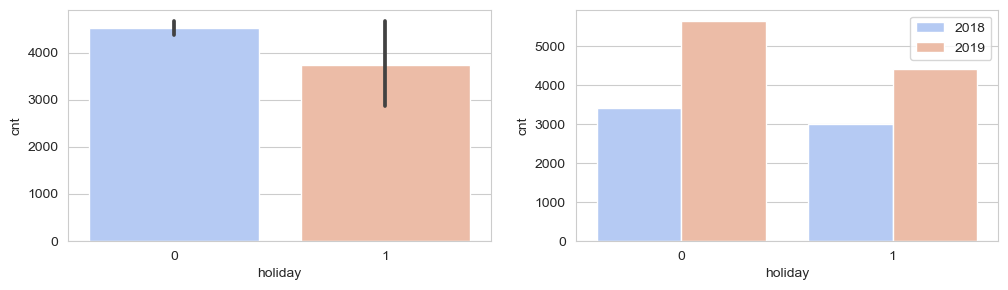

In [35]:
# plotting visualization for holiday column
plot_cat_columns('holiday')

## <font color='blue'>Observations : </font> 
<font color='blue'> During Holidays the demand increases</font> 

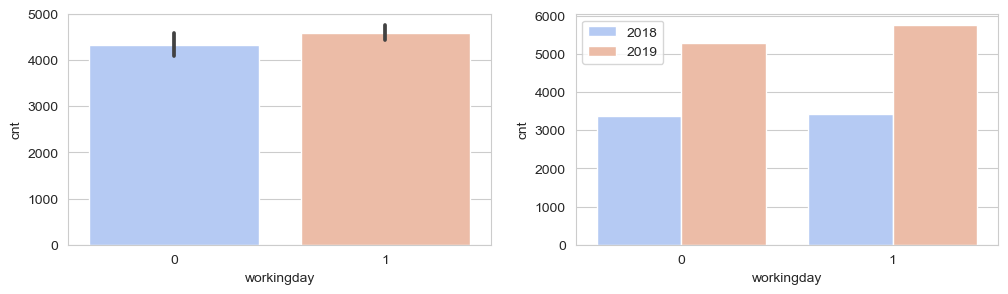

In [36]:
# plotting visualization for workingday column
plot_cat_columns('workingday')

## <font color='blue'>Observations : </font> 
<font color='blue'> Booking seems to be almost same as the working day or the non working day, but there is increase from 2018 to 2019</font> 

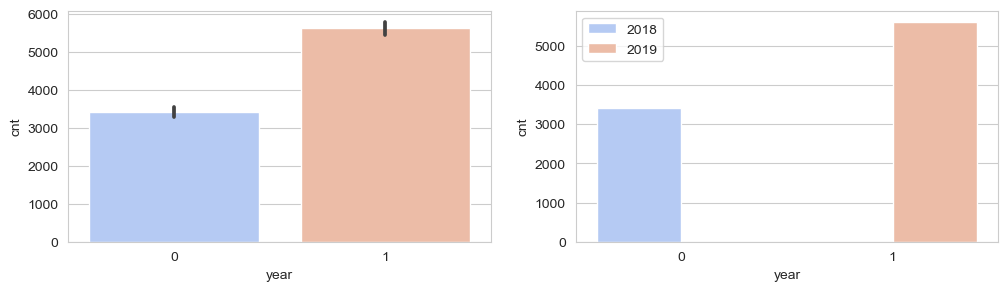

In [37]:
# plotting visualization for year column
plot_cat_columns('year')

## <font color='blue'>Observations : </font> 
<font color='blue'> Increasing trend from 2018 to 2019 good progress in the business</font> 

## <font color='DarkSlateBlue'>Preparing the Data for Modelling </font> 
- <font color='DarkSlateBlue'> Encoding: </font> 
    - <font color='DarkSlateBlue'> Check Binary Catg vars are 0 and 1 format </font> 
    - <font color='DarkSlateBlue'> Other Catg vars to dummy vars</font> 
- <font color='DarkSlateBlue'> Splitting into train and test</font> 
- <font color='DarkSlateBlue'> Rescaling of variables</font> 

In [38]:
bikes_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,age_of_business
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


## <font color='blue'>Observations : </font> 
- <font color='blue'> In previous steps we have checked all variable values using value_count  </font> 
- <font color='blue'> Check if any Binary Categorical Variable with Yes / NO and We dont have any such data   </font> 

## <font color='DarkSlateBlue'>Create Dummy variable </font> 
- <font color='DarkSlateBlue'> Using Pandas built-in function, we create **Dummy** variables for Catg variables</font> 
- <font color='DarkSlateBlue'> As per above EDA visual outcome, weathersit first column was not dropped so as to not lose the info about weather situation. </font> 

In [39]:
#Dummy variable creation for month, weekday, weathersit and season variables.
#drop_first=True because only n-1 dummy variables are needed to explain all categories
#In weathersit first column was not dropped so as to not lose the info about clear weather situation.
bikes_df = pd.get_dummies(data=bikes_df,columns=["season","month","weekday"],drop_first=True)
bikes_df = pd.get_dummies(data=bikes_df,columns=["weathersit"])

In [40]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   humidity                   730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   age_of_business            730 non-null    int64  
 9   season_summer              730 non-null    uint8  
 10  season_fall                730 non-null    uint8  
 11  season_winter              730 non-null    uint8  
 12  month_feb                  730 non-null    uint8  
 13  month_mar                  730 non-null    uint8  

In [41]:
bikes_df.shape

(730, 32)

## <font color='blue'>Observations : </font> 
- <font color='blue'> Dummy Variables are created  </font> 
- <font color='blue'> Bike DF has now 32 columns  </font> 

## <font color='DarkSlateBlue'>Splitting the Data into Training and Testing Sets </font> 

In [42]:
np.random.seed(0)
# We specify this so that the train and test data set always have the same rows, respectively
# The first basic step for regression is performing a train-test split
# The train dataset is set 70% data

df_train, df_test = train_test_split(bikes_df, train_size=0.7, random_state=100)
print("df_train shape" , df_train.shape)
print("df_test shape" , df_test.shape)

df_train shape (510, 32)
df_test shape (220, 32)


In [43]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,age_of_business,season_summer,season_fall,season_winter,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sept,month_oct,month_nov,month_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_Clear,weathersit_Misty,weathersit_Light_snowrain
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,576,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,426,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,728,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,482,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,111,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### <font color='blue'>Observations : </font> 
- <font color='blue'> temp/atemp/hum/windspeed/cnt are at different scales compared to other variables </font> 
- <font color='blue'> The coefficients will be very different for such variables, if model is directly applied </font> 
- <font color='blue'> We will apply Min-Max scaling (normalization) for temp/atemp/hum/windspeed/cnt which sets values between 0 and 1 </font> 
- <font color='blue'> We will apply **Min-Max scaling** on train data as we dont want test data to learn min-max values </font> 

## <font color='DarkSlateBlue'>Rescaling the features</font> 

In [44]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# Rescale only numeric. 
# Binary should not be done because they are zero and ones

# Create a lit of numeric vars 
num_vars = ['temp', 'atemp','humidity','windspeed','age_of_business','cnt']

# 2. fit_transform on Data (learn + apply)
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,age_of_business,season_summer,season_fall,season_winter,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sept,month_oct,month_nov,month_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_Clear,weathersit_Misty,weathersit_Light_snowrain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.791209,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.585165,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.662088,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0.152473,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [45]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,age_of_business,season_summer,season_fall,season_winter,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sept,month_oct,month_nov,month_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_Clear,weathersit_Misty,weathersit_Light_snowrain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.505055,0.247059,0.262745,0.247059,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.625490,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.287907,0.431725,0.440557,0.431725,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.484471,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.255838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.510989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.757898,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <font color='blue'>Observations : </font> 
- <font color='blue'> Rescaling applied  </font> 
- <font color='blue'> Describe shows Min and Max values to 0 and 1  </font> 

In [46]:
print("Total cols:", df_train.columns.size)
print("Cols:", df_train.columns)

Total cols: 32
Cols: Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'age_of_business', 'season_summer', 'season_fall',
       'season_winter', 'month_feb', 'month_mar', 'month_apr', 'month_may',
       'month_jun', 'month_jul', 'month_aug', 'month_sept', 'month_oct',
       'month_nov', 'month_dec', 'weekday_mon', 'weekday_tue', 'weekday_wed',
       'weekday_thu', 'weekday_fri', 'weekday_sat', 'weathersit_Clear',
       'weathersit_Misty', 'weathersit_Light_snowrain'],
      dtype='object')


## <font color='DarkSlateBlue'>Training the Model </font> 

## <font color='DarkSlateBlue'>Correlations between variables </font> 
<font color='DarkSlateBlue'> See which variables are highly correlated with Target variable  </font> 

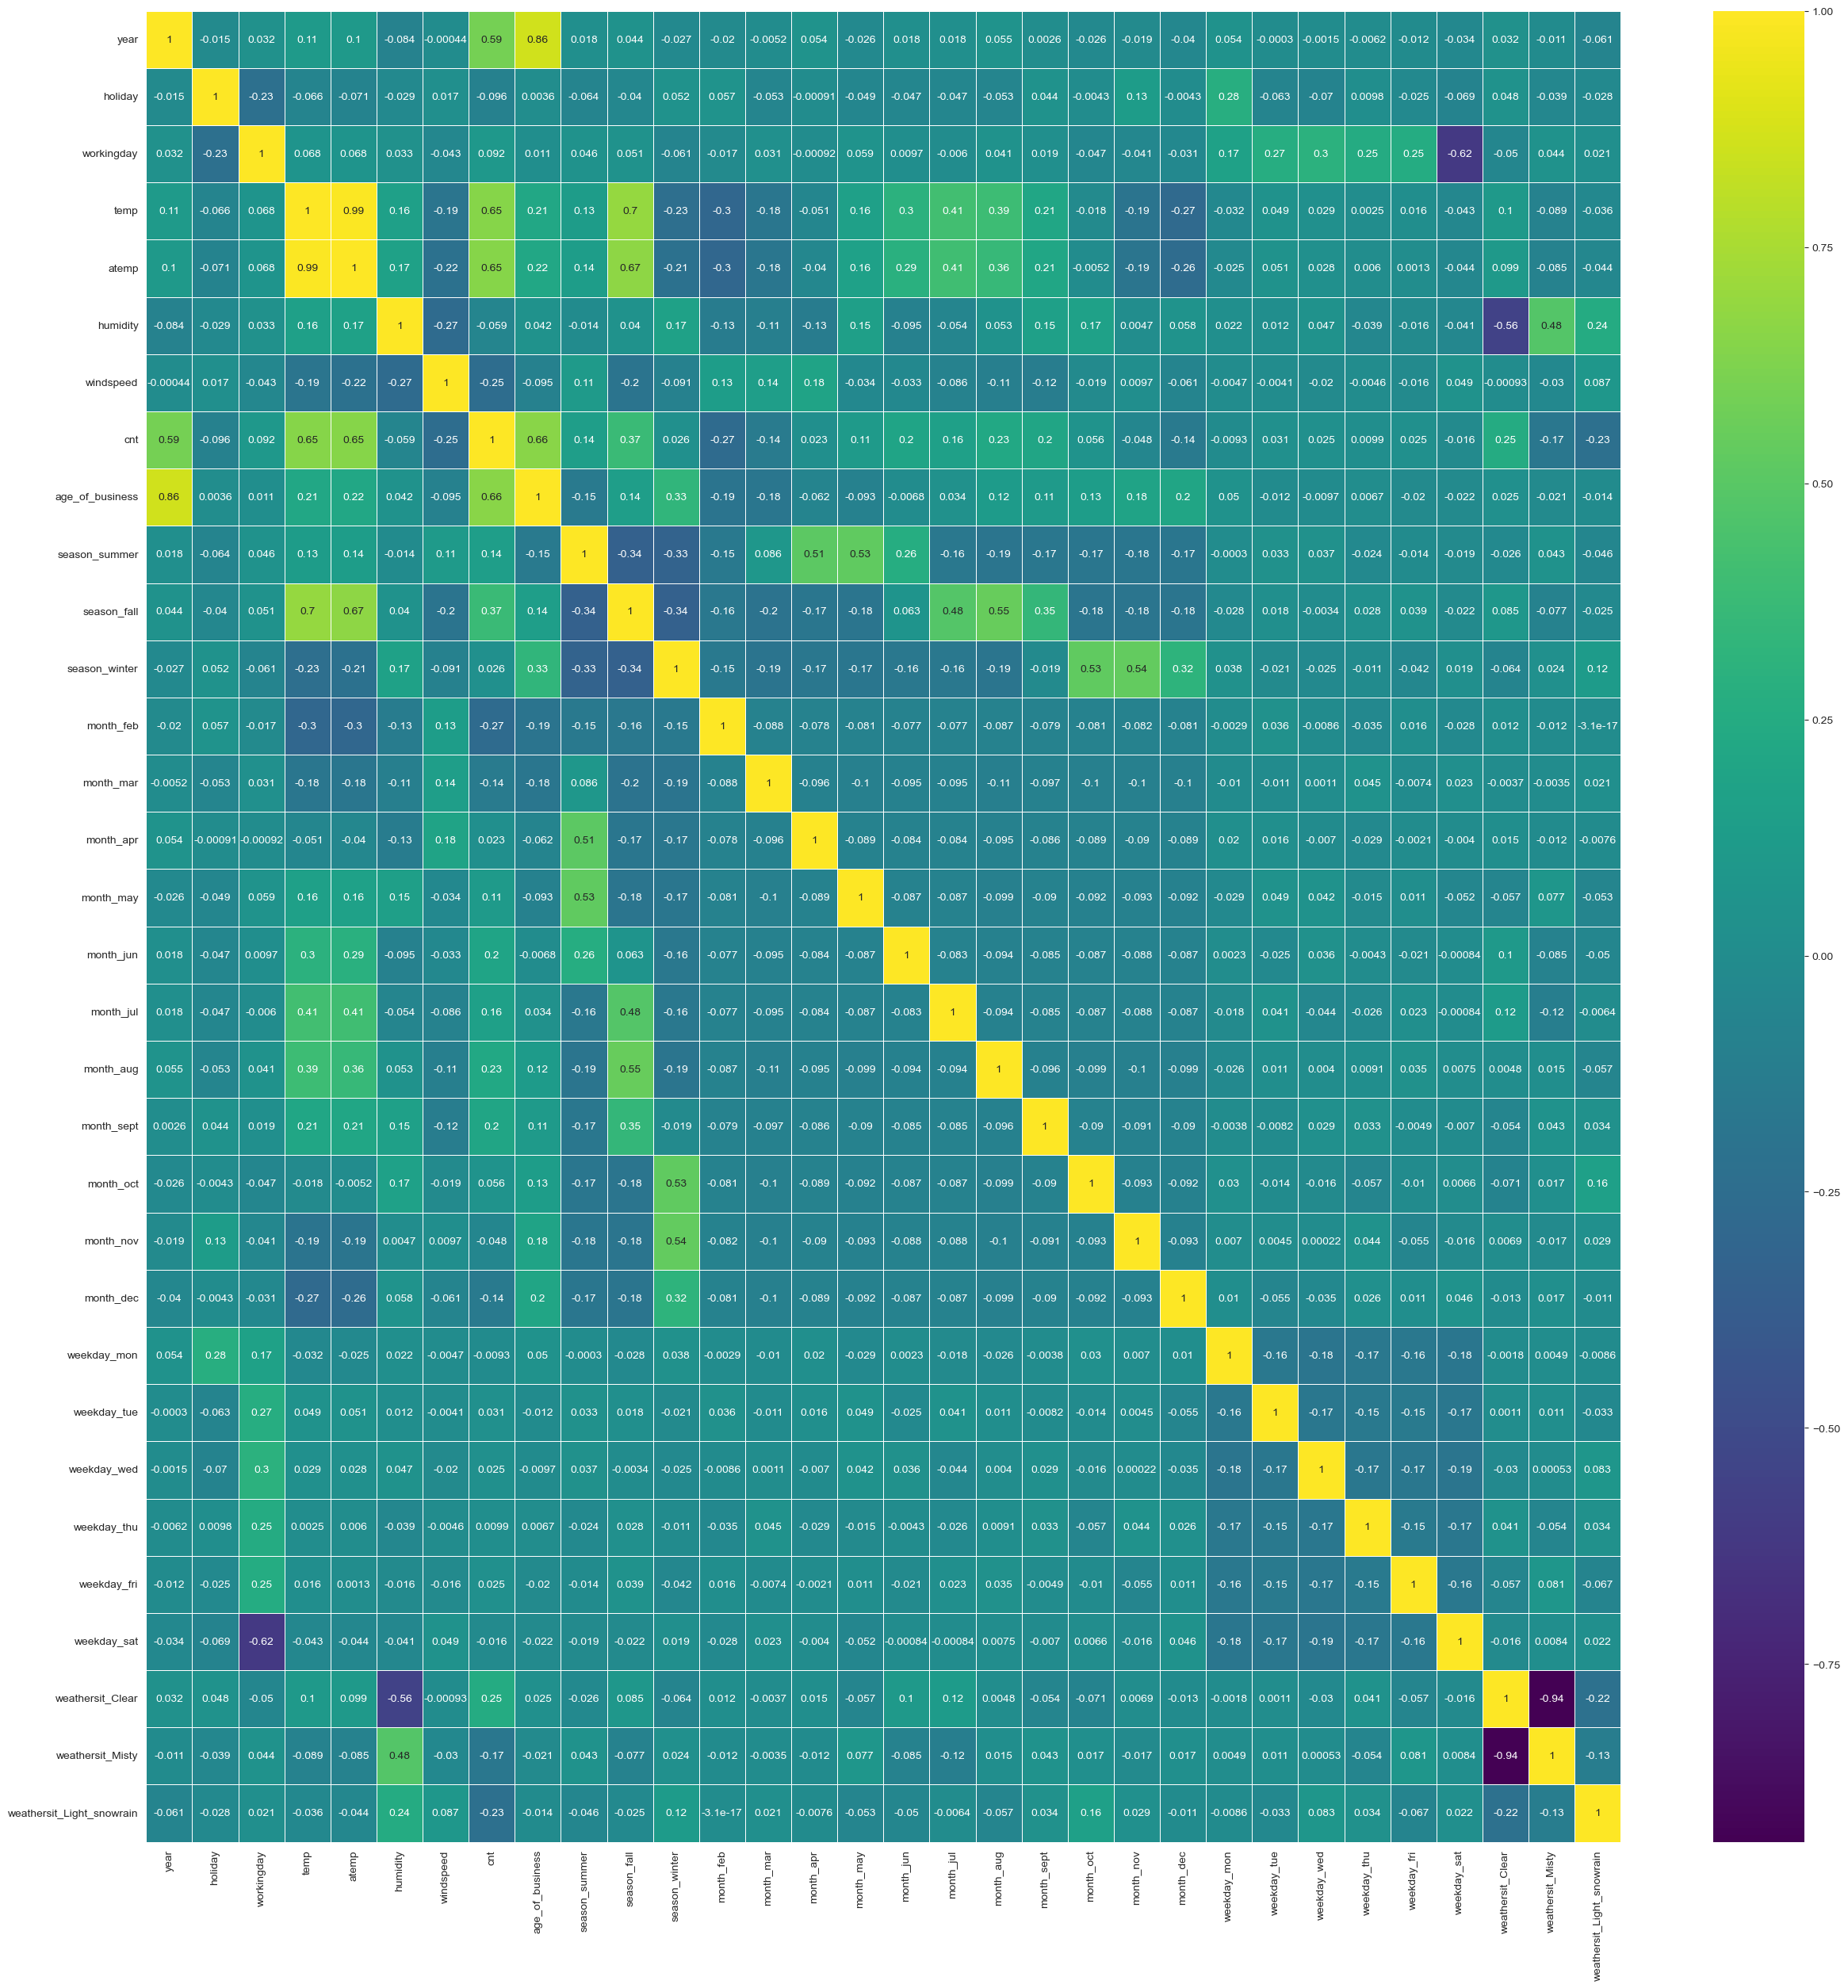

In [47]:
plt.figure(figsize = (30,30))
sns.heatmap(df_train.corr(), annot= True, cmap = "viridis", linewidths=.5)
plt.show()

## <font color='blue'>Observations : </font> 
- <font color='blue'> The heatmap shows, which all variable are multicollinear  </font> 
- <font color='blue'> cnt seems to have correlation with year variable and temp.  </font> 
- <font color='blue'> Similarly, Misty and humidity show correlation.  </font> 
- <font color='blue'> Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.  </font> 
- <font color='blue'> The heatmap shows, variable have high collinearity with the target variable.  </font> 
- <font color='blue'> The heatmap will be used to validate different correlated values along with VIF & p-value, for identifying the correct variable decide selection/elimination from the model. </font> 


In [48]:
bikes_df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'age_of_business', 'season_summer', 'season_fall',
       'season_winter', 'month_feb', 'month_mar', 'month_apr', 'month_may',
       'month_jun', 'month_jul', 'month_aug', 'month_sept', 'month_oct',
       'month_nov', 'month_dec', 'weekday_mon', 'weekday_tue', 'weekday_wed',
       'weekday_thu', 'weekday_fri', 'weekday_sat', 'weathersit_Clear',
       'weathersit_Misty', 'weathersit_Light_snowrain'],
      dtype='object')

## <font color='DarkSlateBlue'>Dividing into X and Y sets for the model building </font> 

In [49]:
y_train = df_train.pop('cnt')
X_train = df_train

## <font color='blue'>Considerations : </font> 
   - <font color='blue'> Should all 31 features be part of our model?  </font> 
   - <font color='blue'> Which all features and on which criteria we need to final model?  </font> 
   - <font color='blue'> Which all features have multicollinearity?  </font> 
   - <font color='blue'> Whats significance of our features?  </font> 
   - <font color='blue'> Do we have +ve or -ve coefficients of those feature varaibles?  </font>   
    
## <font color='blue'> Approach: </font> 
   - <font color='blue'> We will apply coarse selection based on RFE method  </font>    
   - <font color='blue'> Then keep on removing variables based on significance P-value, R2 / R2 adjusted and VIF values  </font>     

## <font color='DarkSlateBlue'>Building our model </font> 

- <font color='DarkSlateBlue'> This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn) </font> 
- <font color='DarkSlateBlue'> Will used sklearn for coarse level feature selction and then use stats module for fine level selection</font> 

## <font color='DarkSlateBlue'>RFE </font> 

<font color='DarkSlateBlue'> Recursive feature elimination. Out of 31 features, we will auto-select 15 features and then do manual checking and action on other features </font> 

In [50]:
# Running RFE with the output number of the variable equal to 15
lr = LinearRegression()
lr.fit(X_train,y_train)

#Built linear regression model using SKLearn
rfe1 = RFE(lr,n_features_to_select=15)
rfe1.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [51]:
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('age_of_business', True, 1),
 ('season_summer', True, 1),
 ('season_fall', False, 2),
 ('season_winter', True, 1),
 ('month_feb', False, 17),
 ('month_mar', False, 6),
 ('month_apr', False, 8),
 ('month_may', False, 7),
 ('month_jun', False, 15),
 ('month_jul', True, 1),
 ('month_aug', False, 14),
 ('month_sept', True, 1),
 ('month_oct', False, 16),
 ('month_nov', True, 1),
 ('month_dec', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weekday_thu', False, 13),
 ('weekday_fri', False, 11),
 ('weekday_sat', False, 3),
 ('weathersit_Clear', True, 1),
 ('weathersit_Misty', True, 1),
 ('weathersit_Light_snowrain', True, 1)]

## <font color='DarkSlateBlue'>Function to build model using statsmodel and Calculate VIF's  </font> 

In [52]:
#Function to show stats summary -Takes the columns for which VIF to be calcualted as a parameter
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
# A function to build a model which takes columns to be build model from 
def model_building_func(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm


#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def vif_calc_func(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))    

In [53]:
# Features selected by RFE
X_train.columns[rfe1.support_]

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'age_of_business',
       'season_summer', 'season_winter', 'month_jul', 'month_sept',
       'month_nov', 'month_dec', 'weathersit_Clear', 'weathersit_Misty',
       'weathersit_Light_snowrain'],
      dtype='object')

## <font color='blue'>Observations : </font> 
- <font color='blue'>The RFE (Recursive Feature Elimination) have prioritised the columns but we need to manually eliminate fews columns  </font> 


In [54]:
# Features rejected by RFE
X_train.columns[~rfe1.support_]

Index(['workingday', 'atemp', 'season_fall', 'month_feb', 'month_mar',
       'month_apr', 'month_may', 'month_jun', 'month_aug', 'month_oct',
       'weekday_mon', 'weekday_tue', 'weekday_wed', 'weekday_thu',
       'weekday_fri', 'weekday_sat'],
      dtype='object')

In [55]:
# Taking 15 columns supported by RFE for regression
X_training_RFE = X_train[['year', 'holiday', 'temp', 'humidity', 'windspeed', 'age_of_business',
       'season_summer', 'season_winter', 'month_jul', 'month_sept',
       'month_nov', 'month_dec', 'weathersit_Clear', 'weathersit_Misty',
       'weathersit_Light_snowrain']]

X_training_RFE.shape

(510, 15)

In [56]:
X_training_RFE.head()

,year,holiday,temp,humidity,windspeed,age_of_business,season_summer,season_winter,month_jul,month_sept,month_nov,month_dec,weathersit_Clear,weathersit_Misty,weathersit_Light_snowrain
576,1,0,0.815169,0.725633,0.264686,0.791209,0,0,1,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.585165,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1.000000,0,0,0,0,0,1,1,0,0
482,1,0,0.395666,0.504508,0.188475,0.662088,1,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,0.152473,1,0,0,0,0,0,0,1,0


##  <font color='Blue'>Feature selection Approach : </font> 
- <font color='Blue'> P-value - significance below 0.05 to be checked  </font> 
- <font color='Blue'> Drop one variable at a time based on P-value and VIF for multicollinearity </font> 

<font color='Blue'> We will: </font> 
- <font color='Blue'>  High p-value, high VIF #no brainer - Drop   </font> 
- <font color='Blue'>  High-low: </font> 
    - <font color='Blue'>  High p, low VIF #First remove as VIF might come down </font> 
    - <font color='Blue'>  Low p, high VIF # remove this after the ones above </font> 
- <font color='Blue'>  Low p-values, Low VIF #no brainer - Keep   </font> 

## <font color='DarkSlateBlue'>Building model: The RFE (Recursive Feature Elimination) have prioritised the columns but we need to manually eliminate fews columns </font> 
- <font color='DarkSlateBlue'> Model 1 - all columns selected by RFE </font> 
- <font color='DarkSlateBlue'> Manually eliminating features based on above approach</font> 

## <font color='DarkSlateBlue'>Model 1 </font> 

In [57]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['year', 'holiday', 'temp', 'humidity', 'windspeed', 'age_of_business',
       'season_summer', 'season_winter', 'month_jul', 'month_sept',
       'month_nov', 'month_dec', 'weathersit_Clear', 'weathersit_Misty',
       'weathersit_Light_snowrain']

model_building_func(cols)
vif_calc_func(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.4
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.98e-188
Time:                        22:24:54   Log-Likelihood:                 510.52
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     495   BIC:                            -927.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## <font color='blue'>Observations : </font> 
- <font color='blue'>Month July has relatively high P-value and negative coef. Hence will be good to remove first. We will check R2 and VIF's once its removed   </font> 

## <font color='DarkSlateBlue'>Model 2 </font> 

In [58]:
#Selected columns for Model 2 - all columns except month_jul
cols = ['year', 'holiday', 'temp', 'humidity', 'windspeed', 'age_of_business',
       'season_summer', 'season_winter', 'month_sept',
       'month_nov', 'month_dec', 'weathersit_Clear', 'weathersit_Misty',
       'weathersit_Light_snowrain']

model_building_func(cols)
vif_calc_func(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          2.21e-188
Time:                        22:24:54   Log-Likelihood:                 507.64
No. Observations:                 510   AIC:                            -987.3
Df Residuals:                     496   BIC:                            -928.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## <font color='blue'>Observations : </font> 
- <font color='blue'>Removing Month July did not impacted R2 much. Earlier - 0.843 and now 0.841   </font> 
- <font color='blue'>R-squared: 0.841  and Adj.R-squared:0.837 also not much differance</font>
- <font color='blue'>We will now remove age_of_business as high VIF</font>

## <font color='DarkSlateBlue'>Model 3 </font> 

In [59]:
#Selected columns for Model 2 - all columns except month_jul and age_of_business
cols = ['year', 'holiday', 'temp', 'humidity', 'windspeed', 
       'season_summer', 'season_winter', 'month_sept',
       'month_nov', 'month_dec', 'weathersit_Clear', 'weathersit_Misty',
       'weathersit_Light_snowrain']

model_building_func(cols)
vif_calc_func(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.23e-187
Time:                        22:24:54   Log-Likelihood:                 503.08
No. Observations:                 510   AIC:                            -980.2
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## <font color='blue'>Observations : </font> 
- <font color='blue'>Removing age_of_business did not impacted R2 much. Earlier 0.841 and now 0.838  </font> 
- <font color='blue'>R-squared: 0.838  and Adj.R-squared:0.834 also not much difference</font>
- <font color='blue'>We will now remove month_dec as high p-value</font>



## <font color='DarkSlateBlue'>Model 4 </font> 

In [60]:
#Selected columns for Model 2 - all columns except month_jul , age_of_business, month_dec
cols = ['year', 'holiday', 'temp', 'humidity', 'windspeed', 
       'season_summer', 'season_winter', 'month_sept',
       'month_nov', 'weathersit_Clear', 'weathersit_Misty',
       'weathersit_Light_snowrain']

model_building_func(cols)
vif_calc_func(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.5
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.44e-188
Time:                        22:24:54   Log-Likelihood:                 502.45
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## <font color='blue'>Observations : </font> 
- <font color='blue'>Removing month_dec did not impacted R2 much. Earlier 0.838 and now 0.838  </font> 
- <font color='blue'>R-squared: 0.838  and Adj.R-squared:0.834 also not much difference</font>
- <font color='blue'>We will now remove month_nov as high p-value</font>

## <font color='DarkSlateBlue'>Model 5 </font> 

In [61]:
#Selected columns for Model 2 - all columns except month_jul , age_of_business, month_dec, month_nov
cols = ['year', 'holiday', 'temp', 'humidity', 'windspeed', 
       'season_summer', 'season_winter', 'month_sept',
        'weathersit_Clear', 'weathersit_Misty',
       'weathersit_Light_snowrain']

model_building_func(cols)
vif_calc_func(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.32e-189
Time:                        22:24:54   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## <font color='blue'>Observations : </font> 
- <font color='blue'>Removing month_nov did not impacted R2 much. Earlier 0.838 and now 0.837  </font> 
- <font color='blue'>R-squared: 0.837  and Adj.R-squared:0.834 also not much difference</font>
- <font color='blue'>We will now remove weathersit_Clear as high VIF as it might be correlated to some other variable in the model hence we can remove it and check</font>           

## <font color='DarkSlateBlue'>Model 6 </font> 

In [62]:
#Selected columns for Model 2 - all columns except month_jul , age_of_business, month_dec, month_nov, weathersit_Clear
cols = ['year', 'holiday', 'temp', 'humidity', 'windspeed', 
       'season_summer', 'season_winter', 'month_sept',
         'weathersit_Misty',
       'weathersit_Light_snowrain']

model_building_func(cols)
vif_calc_func(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.32e-189
Time:                        22:24:54   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## <font color='blue'>Observations : </font> 
- <font color='blue'>Removing weathersit_Clear did not impacted R2 much. Earlier  0.837 and now same 0.837  </font> 
- <font color='blue'>R-squared: 0.837  and Adj.R-squared:0.834 also not much difference</font>
- <font color='blue'>We will now remove humidity as high VIF as it might be correlated to some other variable in the model hence we can remove it and check</font>    

## <font color='DarkSlateBlue'>Model 7 </font> 

In [63]:
#Selected columns for Model 2 - all columns except month_jul , age_of_business, month_dec, month_nov, 
# weathersit_Clear, humidity
cols = ['year', 'holiday', 'temp',  'windspeed', 
       'season_summer', 'season_winter', 'month_sept',
         'weathersit_Misty',
       'weathersit_Light_snowrain']

model_building_func(cols)
vif_calc_func(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          2.83e-186
Time:                        22:24:54   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## <font color='blue'>Inference : </font> 
- <font color='blue'>We can see from the above final model that **VIF values** are in acceptable range (less than 5) </font> 
    
- <font color='blue'> Also the p-values are **0.000** for all the features </font> 
- <font color='blue'> we have got R2 as **0.830** and adjusted R2 as **0.827** which is almost same </font> 

- <font color='blue'> also **F-statistic** is fairly high, and **Prob (F-statistic)** low, hence we can select the Model 7 for further analysis</font> 

- <font color='blue'> Very **Low** Multicollinearity between the predictors </font>

In [64]:
#Function to fit the linear regression model to all the dataframes passed 
def Build_LR_Model(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [65]:
cols = ['year', 'holiday', 'temp',  'windspeed', 
       'season_summer', 'season_winter', 'month_sept',
         'weathersit_Misty',
       'weathersit_Light_snowrain']

#Build a model with above columns
lr = Build_LR_Model(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.12592584330857548 [ 0.23286073 -0.09868539  0.54800759 -0.15324618  0.08808036  0.1293451
  0.10119495 -0.07837453 -0.28286936]


## <font color='DarkSlateBlue'>Evaluating the model </font> 

<font color='DarkSlateBlue'>Residual Analysis of the train data. 
So, now to check if the error terms are also normally distributed 
(which is infact, one of the major assumptions of linear regression), 
let us plot the histogram of the error terms and see what it looks like. </font> 

In [66]:
y_train_pred= lr.predict(X_train[cols])

## <font color='DarkSlateBlue'>Histogram of residuals </font> 

In [67]:
#Function for plotting the histogram of residuals to check the distribution
def Residual_plot(actual, predicted):
    sns.distplot(actual-predicted)
    plt.title('Error Terms')
    plt.xlabel('Errors')

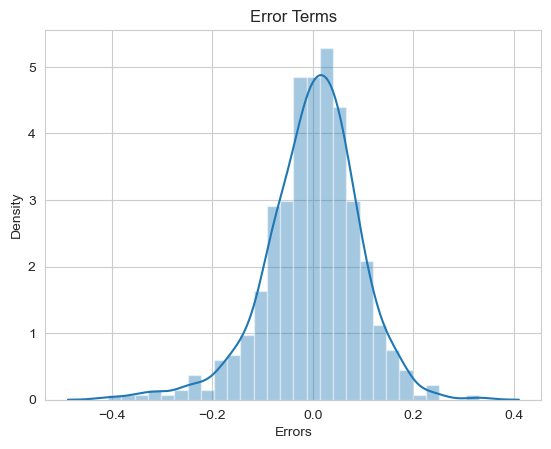

In [68]:
Residual_plot(y_train, y_train_pred)

## <font color='blue'>Observations : </font> 
<font color='blue'>The residuals are normally distributed hence the model seems to be working fine</font>    

## <font color='DarkSlateBlue'>Actual v/s Predicted plot </font> 

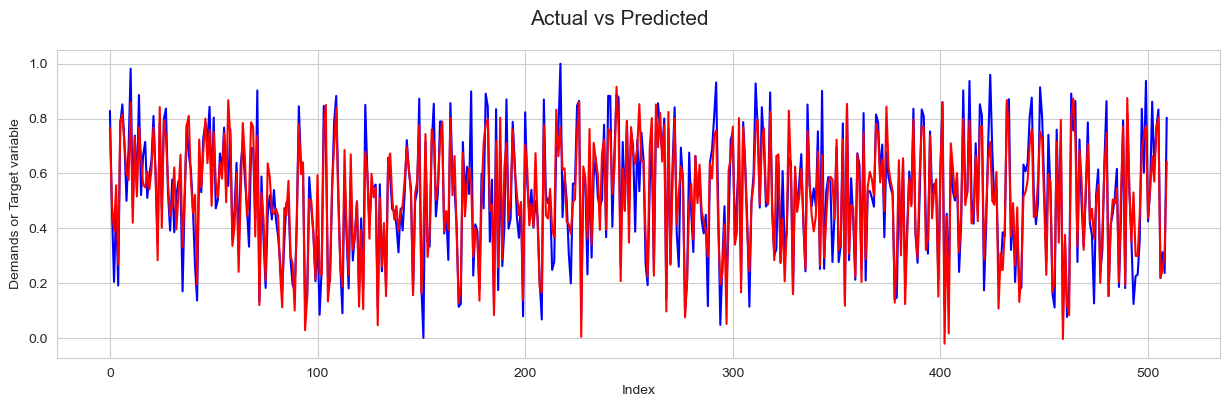

In [69]:
# Plotting Actual v/s Predicted to check how accurate is the model
plt.figure(figsize = (15,4))

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands or Target variable')
plt.show()

## <font color='blue'>Observations : </font> 
<font color='blue'>Actual and predicted follow almost same pattern, hence model is working fine</font>    

## <font color='DarkSlateBlue'>Independence of error terms </font> 

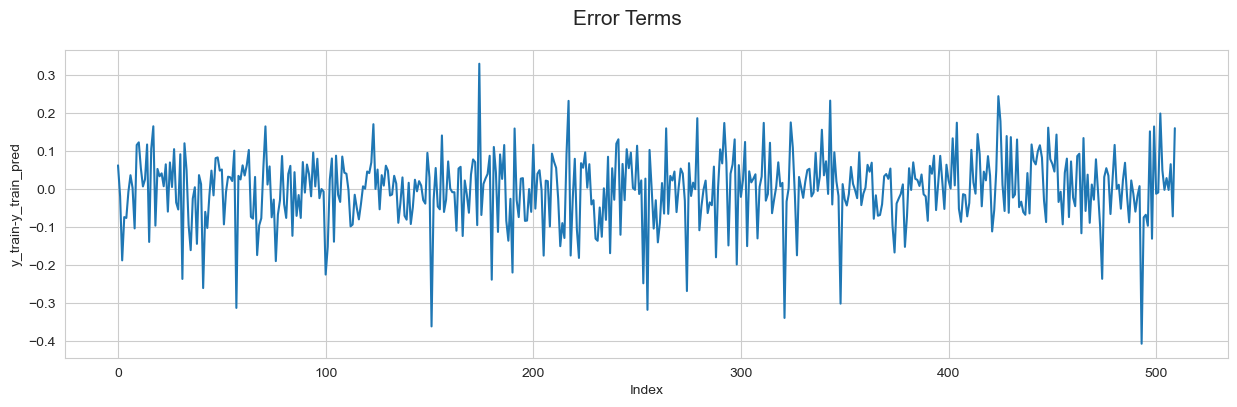

In [70]:
# To check the independence of error terms
plt.figure(figsize = (15,4))

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

## <font color='blue'>Observations : </font> 
<font color='blue'>Error terms are independent of each other hence the model is good</font>    

## <font color='DarkSlateBlue'>R-squared Value </font> 

In [71]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8303450237489228

## <font color='blue'>Observations : </font> 
<font color='blue'>As we can see the r2 value is similar to the one we got for the model which is 0.830 </font>    

## <font color='DarkSlateBlue'>Linearity Check </font> 

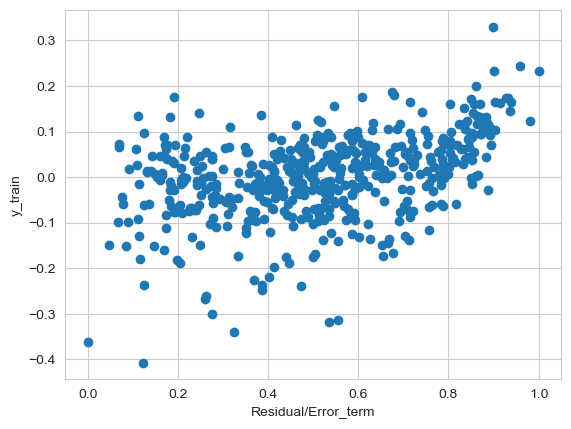

In [72]:
# plotting y_train v/s Residual/Error terms
error_term = (y_train - y_train_pred)
plt.scatter(y_train,error_term)
plt.ylabel("y_train")
plt.xlabel("Residual/Error_term")
plt.show()

## <font color='DarkSlateBlue'>Predicting values in test dataset </font> 

In [73]:
#Scaling the numeric variables in X_test dataset before prediction
numeric_variables = ['temp', 'atemp','humidity','windspeed','age_of_business','cnt']

#Test data to be transformed only, no fitting
df_test[numeric_variables] = scaler.transform(df_test[numeric_variables])

In [74]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       220 non-null    int64  
 1   holiday                    220 non-null    int64  
 2   workingday                 220 non-null    int64  
 3   temp                       220 non-null    float64
 4   atemp                      220 non-null    float64
 5   humidity                   220 non-null    float64
 6   windspeed                  220 non-null    float64
 7   age_of_business            220 non-null    float64
 8   season_summer              220 non-null    uint8  
 9   season_fall                220 non-null    uint8  
 10  season_winter              220 non-null    uint8  
 11  month_feb                  220 non-null    uint8  
 12  month_mar                  220 non-null    uint8  
 13  month_apr                  220 non-null    uint8

In [75]:
X_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,age_of_business,season_summer,season_fall,season_winter,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sept,month_oct,month_nov,month_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_Clear,weathersit_Misty,weathersit_Light_snowrain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.252747,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.734890,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.410714,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.303571,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.208791,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [76]:
#Taking columns from final model 7

cols_final_model = ['year', 'holiday', 'temp',  'windspeed', 
       'season_summer', 'season_winter', 'month_sept',
         'weathersit_Misty',
       'weathersit_Light_snowrain']

X_test=X_test[cols_final_model]
#Predict the values for test data

y_test_pred = lr.predict(X_test)

## <font color='DarkSlateBlue'>R2 and Adjusted R2 for Test Data </font> 

In [77]:
# R squared for test data set
r2=r2_score(y_test,y_test_pred)
r2

0.7941977535477245

In [78]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7853776572711983

In [79]:
##### Looking at the RMSE

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09919821639088688

## <font color='DarkSlateBlue'>Lets check homoscedastic </font> 

Text(0, 0.5, 'y_test_pred')

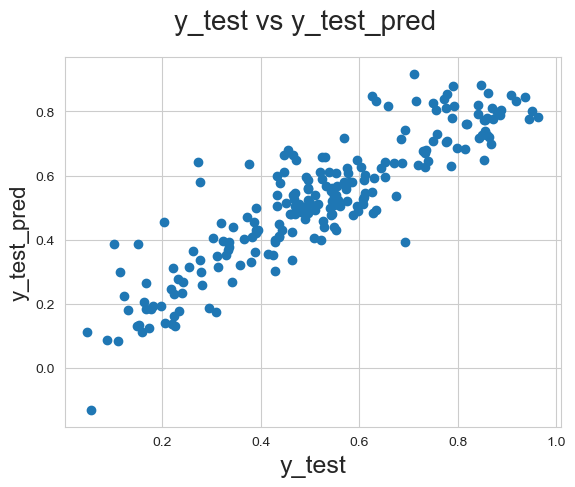

In [80]:
# Checking the spread 

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_test_pred', fontsize = 16)

## <font color='blue'>Observations : </font> 
<font color='blue'>The variance of residuals is almost constant </font>    


## <font color='DarkSlateBlue'>Test set v/s Predicted test set </font> 

In [81]:
# function to plot the test set against predicted set of values
def actual_vs_pred(actual,predicted,scaling,dtname):
    c = [i for i in range(1,scaling,1)]
    fig = plt.figure(figsize=(14,4))
    plt.plot(c,actual, color="green", linewidth=2.5, linestyle="-")
    plt.plot(c,predicted, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Comparison of Actual and Predicted values- '+dtname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)  

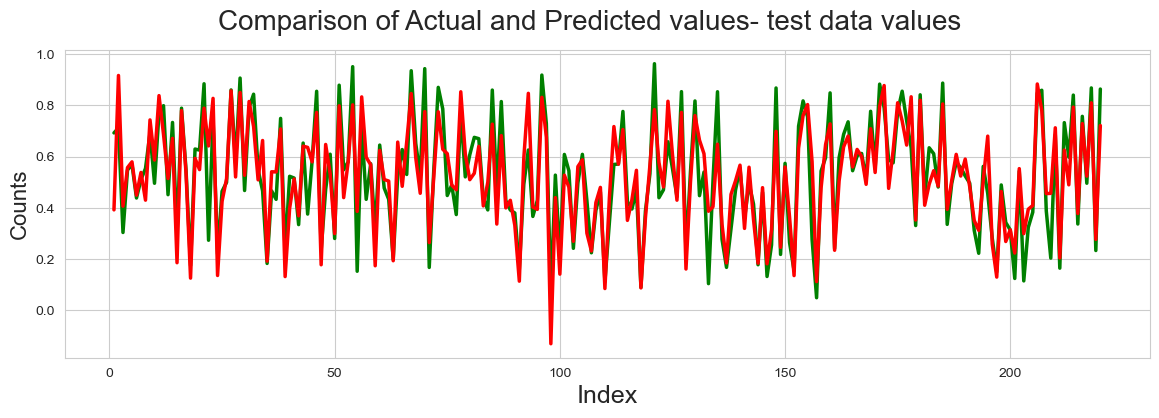

In [82]:
actual_vs_pred(y_test,y_test_pred,len(y_test)+1,'test data values')

## <font color='blue'>Observations : </font> 
<font color='blue'>The red line graph for predicted values is very accurately overlapping the green line graph for the actual value hence we can say the model is good </font>    

## <font color='DarkSlateBlue'>Distribution of error terms </font> 

In [83]:
# function to plot the distribution of Error terms
def dist_error_terms(actual,predicted):
    c = [i for i in range(1,221,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,actual-predicted, color="red", marker='o', linewidth=4.0, linestyle="")
    fig.suptitle('Distribution of Error Terms', fontsize=20)             
    plt.xlabel('Index', fontsize=18)                      
    plt.ylabel('Actual - Predicted ', fontsize=16)     

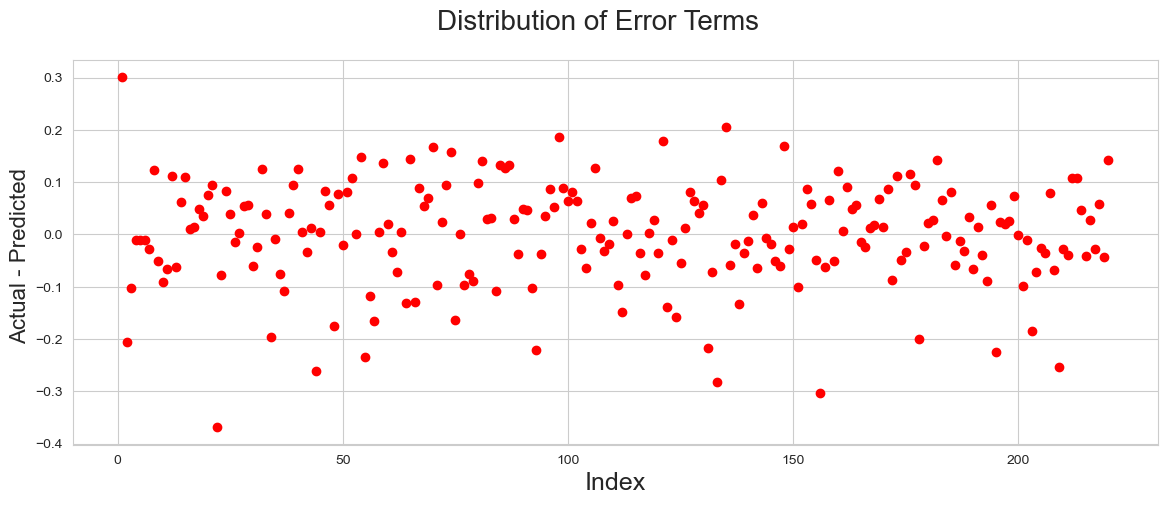

In [84]:
dist_error_terms(y_test,y_test_pred)

## <font color='blue'>Observations : </font> 
<font color='blue'>The error terms are showing no pattern in distribution they are distributed randomly hence the output explains the model well </font>    

## <font color='DarkSlateBlue'>Rebuilding the final model </font> 

In [85]:
cols = ['year', 'holiday', 'temp',  'windspeed', 
       'season_summer', 'season_winter', 'month_sept',
         'weathersit_Misty',
       'weathersit_Light_snowrain']

lm=model_building_func(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          2.83e-186
Time:                        22:24:59   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## <font color='DarkSlateBlue'>VIF</font> 

In [86]:
vif_calc_func(cols)

                    Features   VIF
2                       temp  3.68
3                  windspeed  3.06
0                       year  2.00
4              season_summer  1.57
7           weathersit_Misty  1.48
5              season_winter  1.37
6                 month_sept  1.20
8  weathersit_Light_snowrain  1.08
1                    holiday  1.04


## <font color='blue'>Observations : </font> 
<font color='blue'>There is No Multicollinearity between the predictor variables,  as all the values are within permissible range of below 5 </font>    

## <font color='DarkSlateBlue'>Final coefficients</font> 

In [87]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,10))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.548008
1,year,0.232861
6,season_winter,0.129345
0,const,0.125926
7,month_sept,0.101195
5,season_summer,0.088080
8,weathersit_Misty,-0.078375
2,holiday,-0.098685
4,windspeed,-0.153246


# <font color='DarkSlateBlue'> Final interpretaion of the results: 


#### <font color='blue'> 1. There seems to be less demand of bikes during bad weather (snow) condition hence the company may use this time to probably service their bikes or get new bikes to replace older ones to get the customers by surprise and hence improving business after bad weather condition.

#### <font color='blue'> 2. The customer demand might increase after year 2019 as the popularity of the business is increasing throughout 2018 and 2019 

#### <font color='blue'> 3. The company should try to focus to increase their sales during Winter season 

#### <font color='blue'> 4. The temperature is affecting the business and is highly related to the demand of bikes 
    
#### <font color='blue'> 5. Company should focus on expanding business during September.

#### <font color='blue'> 5. The company should come up with new offers during Winter and also advertise a little for September as this is when business would be at its best.

## <font color='DarkSlateBlue'>Important varaiables Conclusion </font> 
- <font color='blue'> temp </font>    
- <font color='blue'> year </font>    
- <font color='blue'> season_winter</font>    
- <font color='blue'> month_sept</font>    
- <font color='blue'> season_summer</font>    
- <font color='blue'> weathersit_Misty</font>    
- <font color='blue'> holiday</font>    
- <font color='blue'> windspeed</font>    
- <font color='blue'> weathersit_Light_snowrain</font>    

## <font color='DarkSlateBlue'>Final Result Comparison : </font> 
- <font color='blue'>Train - R2 = **0.830**  , Train - Adjusted R2 = **0.827** </font>    
- <font color='blue'>Test - R2 = **0.794**   , Train - Adjusted R2 = **0.785** </font>    
- <font color='blue'>Based on above , this is a fair model to make predictions for unseen test data. </font>    

## <font color='DarkSlateBlue'> F Statistics</font> 

<font color='Blue'> 
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

    
- F-statistic: **271.9**
- Prob (F-statistic): **2.83e-186**

The F-Statistics value of 271 (which is greater than 1) and the p-value of '0.0000' states that the 
**overall model is significant**
        

## <font color='DarkSlateBlue'> Interpretation of Coefficients:</font> 

<font color='blue'>

#### As per our final Model 7, the top 3 predictor variables that affects the demand or target variable are:

- **Temperature (temp)** - A coefficient value of ‘0.5480’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5480 units.

- **weathersit_Light_snowrain** - A coefficient value of ‘-0.2828’ indicates that with unit increase in weathersit_Light_snowrain the demand of bikes will decrease by 0.2828 units.

    
- **Year (yr)** - A coefficient value of ‘ 0.2328’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2328 units.
    
Few more variables that play important role are:    
    
    
    
    
**season_winter** - A coefficient value of ‘0.1293’ indicates that with unit increase in season_winter the demand of bikes will increase by 0.1293 units.

**windspeed** - A coefficient value of ‘-0.1532’ indicates that with unit increase in windspeed the demand of bikes will decrease by -0.1532 units.

**The equation of best fitted surface based on model7:**
cnt = 0.125926 + (**yr** × 0.232861) + (**temp** × 0.548008) + (**mnth_sept** x 0.101195) + (**season_winter** x 0.129345) + (**season_summer** x 0.088080) - (**weathersit_Misty** x 0.078375) − (**windspeed** x 0.153246) − (**holiday** x 0.098685) − (**weathersit_Light_snowrain** x 0.282869)        